In [1]:
import pandas as pd
import os
from env import username, host, password
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


    bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  \
4          4.0          2.0                        3633.0           296425.0   
6          3.0          4.0                        1620.0           847770.0   
7          3.0          2.0                        2077.0           646760.0   
11         0.0          0.0                        1200.0             5328.0   
14         0.0          0.0                         171.0             6920.0   

    yearbuilt  taxamount    fips  
4      2005.0    6941.39  6037.0  
6      2011.0   10244.94  6037.0  
7      1926.0    7924.68  6037.0  
11     1972.0      91.60  6037.0  
14     1973.0     255.17  6037.0  


In [3]:
df.columns = ['bedrooms','bathrooms','sq_feet','tax_value','year_built','tax_amount','fips']

In [4]:
df.head()

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,60370
6,3,4.0,1620.0,847770.0,2011,10244.94,60370
7,3,2.0,2077.0,646760.0,1926,7924.68,60370
18,3,1.0,1244.0,169471.0,1950,2532.88,60370
19,3,2.0,1300.0,233266.0,1950,3110.99,60370


In [5]:
df = df.drop(columns='tax_amount')
cols = df.columns.tolist()

In [28]:
df.fips = df.fips.astype('string')

In [6]:
train, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train)

In [18]:
float_list = ['bathrooms','sq_feet','tax_value']
float_list

['bathrooms', 'sq_feet', 'tax_value']

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

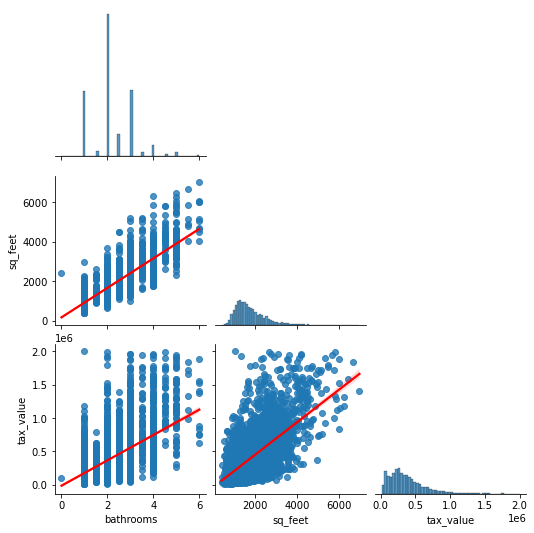

In [31]:
def plot_variable_pairs(df):
    sns.pairplot(df[float_list].sample(5000), kind='reg', corner=True,plot_kws={'line_kws':{'color':'red'}})
    plt.show()
    
plot_variable_pairs(train)

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

['bedrooms', 'fips']
['bathrooms', 'sq_feet', 'tax_value']


ValueError: Could not interpret input 'f'

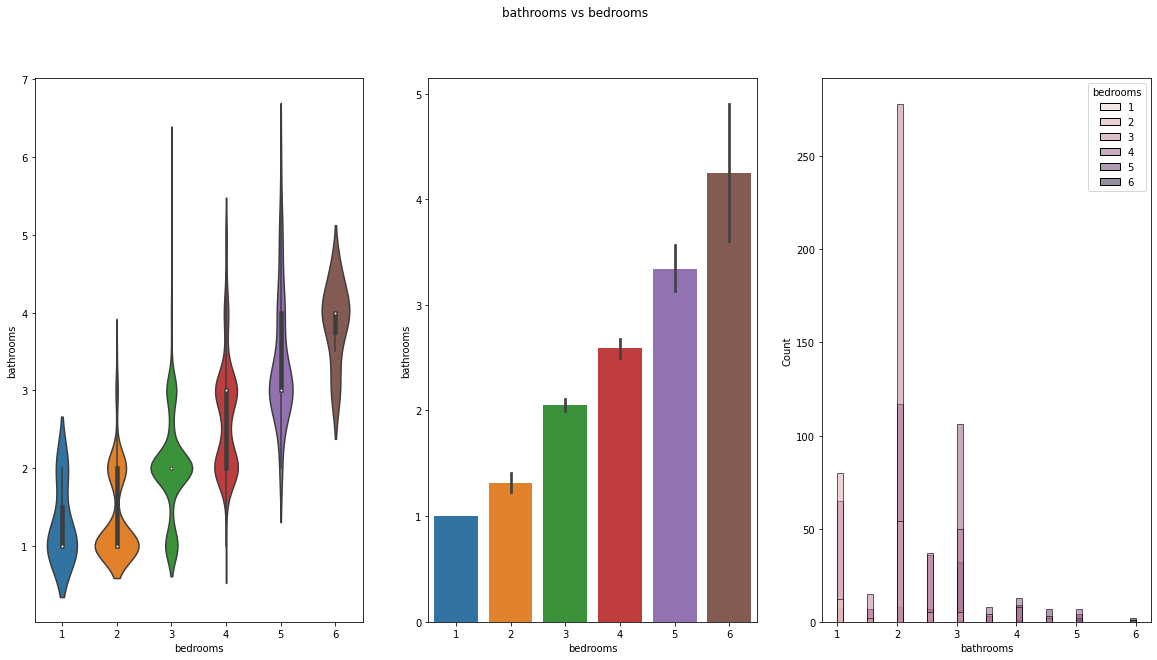

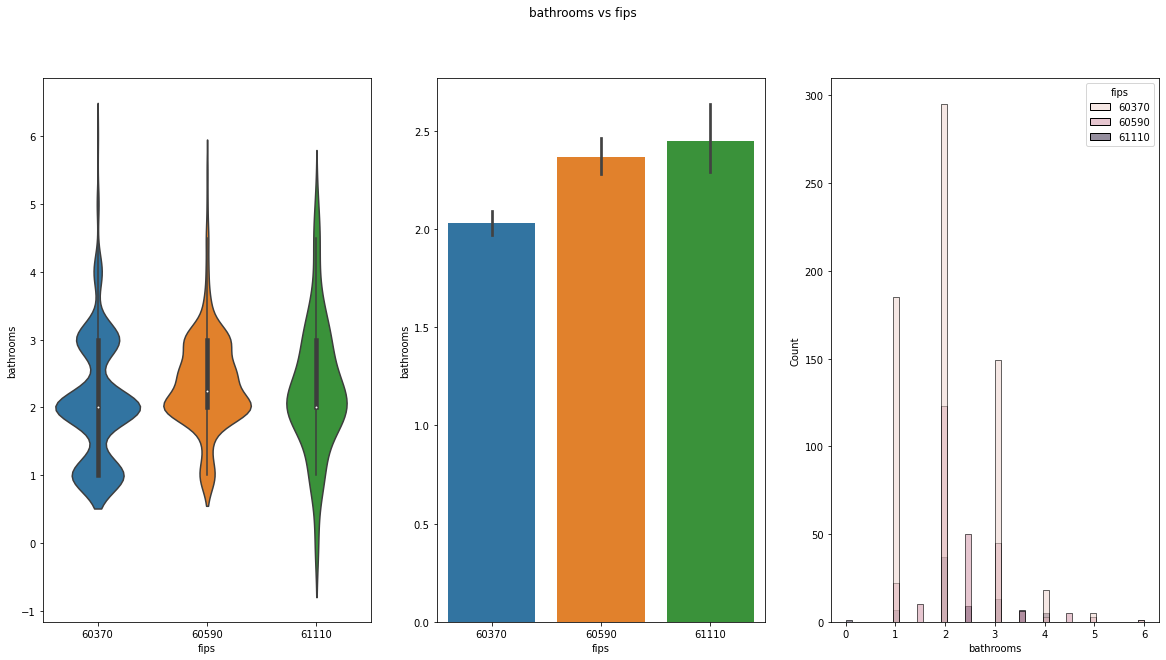

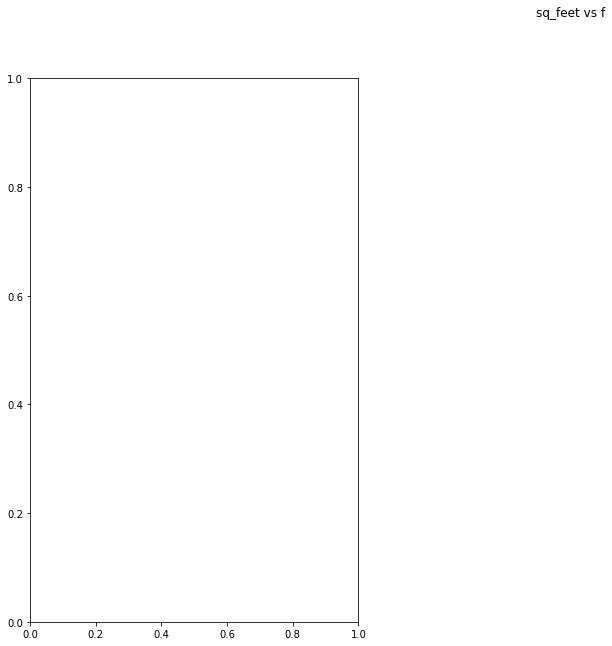

In [33]:
def plot_categorical_and_continuous_vars(df,columns):
    df=df.drop(columns='year_built')
    cat = []
    con = []
    for i in df.columns:
        if df[i].dtype == "float" :
            con.append(i)
        else:
            cat.append(i)
    print(cat)
    print(con)
    for cont in con:
        for cat in cat:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{cont} vs {cat}')
            

            plt.subplot(131)
            sns.violinplot(data=df.sample(1000), x = cat, y = cont)
           

            plt.subplot(1, 3, 3)
            sns.histplot(data = df.sample(1000), x = cont, bins = 50, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = df.sample(1000), x = cat, y = cont)
    
    
plot_categorical_and_continuous_vars(train,cols)

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Come up with some initial hypotheses based on your goal of predicting property value.

Visualize all combinations of variables in some way.

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Explore your dataset with any other visualizations you think will be helpful.